In [1]:
%load_ext autoreload
%autoreload 2

import pickle
import matplotlib.pyplot as plt

In [2]:
from utils.train_medical import run_mimic_experiments, run_eeg_experiments, run_medical_experiments

# MIMIC-III: forecasting white blood cell count

In [9]:
mimic_results = run_medical_experiments(retrain=True, dataset='mimic')

Training CPRNN
Epoch: 0	Train loss: 156.74915640694755


KeyboardInterrupt: 

# EEG dataset: forecasting EEG signals
Signals come from different distributions. Patients are shown different combinations of stimuli, and the recordings are taken from different parts of the brain.

Split 896 training instances to 600 / 296 true training/calibration.

(if using control data only, then 448 = 300 + 148)

Downsample training sequences to 50 steps
* 40 steps input, 10 prediction

In [26]:
from utils.eeg_data_processing import get_raw_eeg_data
data = get_raw_eeg_data(cached=True, split='train')

In [45]:
from scipy.signal import resample

In [29]:
len(data)

19200

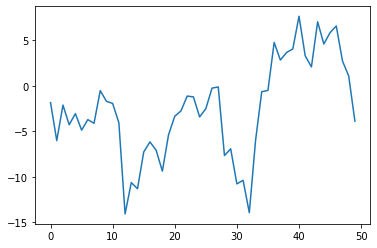

In [117]:
i = np.random.randint(19200)
plt.plot(data_resampled[i])

In [94]:
len(data)

0

In [96]:
b'0'

"b'0'"

In [105]:
import os
import pathlib
import gzip

In [110]:
def parse_eeg_file(filename):
    with gzip.open(filename, 'rb') as f:
        chans = {}
        for line in f:
            tokens = line.decode('ascii').split()
            print(tokens[0])
            if tokens[0] != '#':
                print('here')
                if tokens[1] not in chans.keys():
                    chans[tokens[1]] = []
                chans[tokens[1]].append(float(tokens[3]))
            break
        chan_arrays = []
        for chan in chans.values():
            chan_arrays.append(chan)
    return chan_arrays

root = 'data/eeg/SMNI_CMI_TRAIN'

dataset = []
for folder in os.listdir(root):
    if folder != 'README' and (False or folder[3] == 'c'):
        subfolder = os.path.join(root, folder)
        for filename in os.listdir(subfolder):
            f = os.path.join(subfolder, filename)
            print(f)
            if '.gz' in pathlib.Path(f).suffixes:
                chan_arrays = parse_eeg_file(f)
                dataset.extend(chan_arrays)
                break

data/eeg/SMNI_CMI_TRAIN/co2c0000344/co2c0000344.rd.071.gz
#
data/eeg/SMNI_CMI_TRAIN/co2c0000342/co2c0000342.rd.001.gz
#
data/eeg/SMNI_CMI_TRAIN/co2c0000345/co2c0000345.rd.014.gz
#
data/eeg/SMNI_CMI_TRAIN/co2c0000340/co2c0000340.rd.007.gz
#
data/eeg/SMNI_CMI_TRAIN/co2c0000347/co2c0000347.rd.059.gz
#
data/eeg/SMNI_CMI_TRAIN/co2c0000346/co2c0000346.rd.026.gz
#
data/eeg/SMNI_CMI_TRAIN/co2c0000341/co2c0000341.rd.019.gz
#
data/eeg/SMNI_CMI_TRAIN/co2c0000337/co2c0000337.rd.027.gz
#
data/eeg/SMNI_CMI_TRAIN/co2c0000339/co2c0000339.rd.035.gz
#
data/eeg/SMNI_CMI_TRAIN/co2c0000338/co2c0000338.rd.035.gz
#


In [122]:
X_train = data_resampled

calibration_idx = np.random.choice(len(X_train), replace=False,
                                           size=int(0.2 * len(X_train)))
train_idx = np.setdiff1d(range(len(X_train)), calibration_idx)

In [123]:
calibration_idx

array([ 7668, 14526, 11465, ...,   883,  7084, 18803])

In [126]:
import torch

In [13]:
from utils.train_mimic import run_medical_experiments
results = run_medical_experiments(dataset='eeg')

here


In [15]:
results['CPRNN']['mean_coverage']

0.9716145992279053

In [23]:
np.mean(results['CPRNN']['interval_widths']), np.std(results['CPRNN']['interval_widths'])

(66.30071601867675, 13.065296320516955)

In [17]:
results['DPRNN']['Coverage']

0.4481880208333333

In [18]:
results['DPRNN']['CI length']

8.05982

In [24]:
import numpy as np
ci = results['DPRNN']['Confidence intervals']
np.mean(np.mean(ci, axis=0).flatten()), np.mean(np.std(ci, axis=0).flatten())

(8.0598135, 6.8367715)

In [21]:
results['DPRNN']['Confidence intervals']

NameError: name 'results' is not defined

In [20]:
results['QRNN']['Coverage']

0.8731104166666667

In [21]:
results['QRNN']['CI length']

21.264711

In [25]:
ci = results['QRNN']['Confidence intervals']
np.mean(np.mean(ci, axis=0).flatten()), np.mean(np.std(ci, axis=0).flatten())

(21.264704, 11.7837)

In [33]:
from utils.mimic_data_processing import process_mimic_data

In [34]:
X, Y, L = process_mimic_data()

In [35]:
len(X)

4323

In [37]:
np.mean(L), np.std(L)

(10.554244737450844, 7.011804421918092)

In [40]:
np.min(L)

5